In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/bengali-hate-speech-dataset/Bengali hate speech .csv


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import warnings
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_selection import SelectKBest, chi2


In [3]:
df = pd.read_csv("/kaggle/input/bengali-hate-speech-dataset/Bengali hate speech .csv")
df.head()

,sentence,hate,category
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports


In [4]:
df.drop(columns=['category'], inplace=True)

In [5]:
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [6]:
def punctuations_remover(my_str):
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = " "
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("\n",' ')
    return no_punct
df.sentence = df.sentence.apply(lambda x: punctuations_remover(x))

In [7]:
# Define function for text cleaning
def text_cleaner(text):
    # Remove non-Bengali characters and punctuation
    cleaned_text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Apply text cleaning
df['sentence'] = df['sentence'].apply(text_cleaner)

In [8]:
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['hate'] = encoder.fit_transform(df['hate'])
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [10]:
df.head()

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1


In [11]:
######### foreign language removing #######
def for_lan_re(text):
    text = "".join(i for i in text if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
    sentence = re.sub(' +', ' ', text)
    return sentence
df.sentence = df.sentence.apply(lambda x: for_lan_re(x))

In [12]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the remove_emojis function to the 'Text' column
df['sentence'] = df['sentence'].apply(remove_emojis)

# Display the modified DataFrame
print("\nDataFrame after removing emojis:")

df.sample(10)


DataFrame after removing emojis:


,sentence,hate
13056,এই সিনেমার মতো তোমার বাস্তব জীবন টা তোমার দু...,0
17075,পেক না তাকে রিমান্ড এ নিয়ে গেলে সটিক তত্ত্ব চ...,0
18093,সাধনাই ক্যামেরা লাগিয়েছে এটা প্রথম ভিডিও দেখে...,0
6978,লুচ্চা কাউয়া কাদির আর ভালো হইলো না,1
19478,ভাইয়া এমন অনেক ভন্ড আছে দেশে সেগুলাকেও রোস্ট ...,0
15264,নিচ তলা ভাড়া হবে,0
14268,সালমান শাহ সেরাদের সেরা,0
6710,সালা পাগলএকবার বউ বলে আবার মা বলে,1
7168,বোকাচোদা বাঙাল আমি নিজে দেখেছি আমার পরিচিত এক...,1
13501,সাকিব খান মানেই অন্য রকম কিছু,0


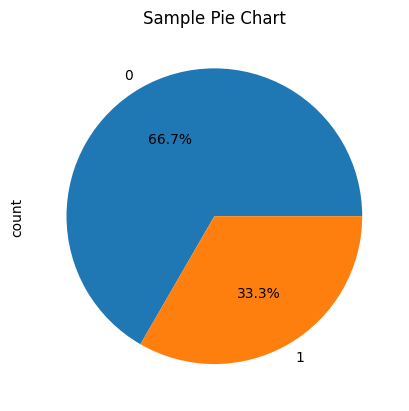

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = df['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Sample Pie Chart")

# Show the plot
plt.savefig("Imbalanced Dataset.jpeg", dpi = 250)
plt.show()

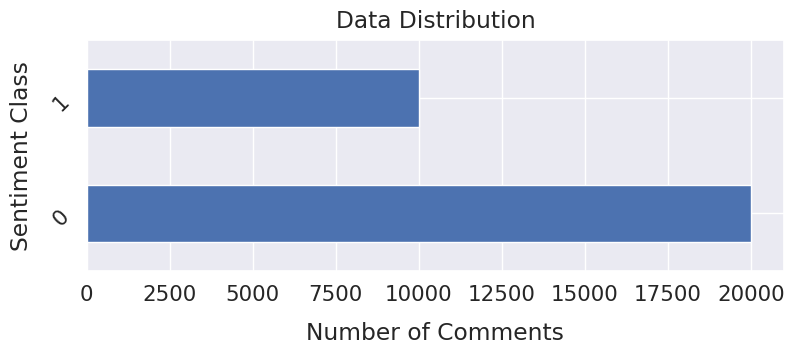

In [14]:
sns.set(font_scale=1.4)
df['hate'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Data Distribution", y=1.02);

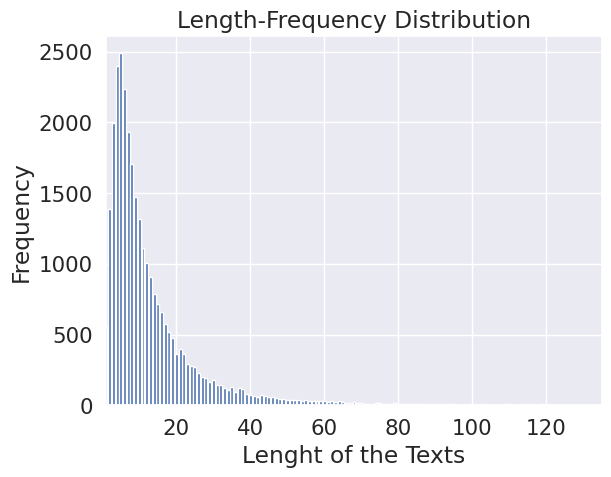

Maximum Length of a review: 534
Minimum Length of a review: 0
Average Length of a reviews: 14.0


In [15]:
# Calculate the Review of each of the Review
df['ReviewLength'] = df.sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in df.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(df.ReviewLength)}")
print(f"Minimum Length of a review: {min(df.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(df.ReviewLength),0)}")

In [16]:
df.shape

(30000, 3)

In [17]:
# count the number of samples in each class
class_counts = df['hate'].value_counts()
print(class_counts)

hate
0    20000
1    10000
Name: count, dtype: int64


In [18]:
# identify the class with the least samples
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()
# calculate the number of samples required to balance the classes
upsample_size = class_counts[max_class] - class_counts[min_class]
print(upsample_size)
## applying upsampling. 
# upsample the minority class to balance the classes
# It samples the data from the data frame with replacement, meaning that it can choose the same sample multiple times.
df_minority_upsampled = df[df['hate'] == min_class].sample(n=upsample_size, replace=True, random_state=42)
df_upsampled = pd.concat([df, df_minority_upsampled])
# shuffle the samples in the balanced dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
# save the balanced dataset to a file

10000


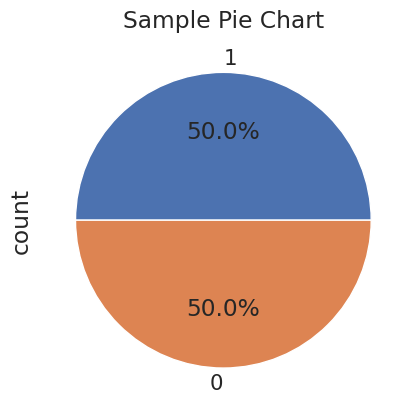

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = df_upsampled['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Sample Pie Chart")

# Show the plot
plt.savefig("Balanced Dataset.jpeg", dpi = 250)
plt.show()

In [20]:
df.head()

,sentence,hate,ReviewLength
0,যত্তসব পাপন শালার ফাজলামী,1,4
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,6
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1,19
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,7
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1,9


In [21]:
import re
import nltk
from nltk.corpus import stopwords
import string

def transform_text(text):
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        i = re.sub(r'\W+', '', i)
        if i:
            y.append(i)
            
    return " ".join(y)
df['transformed_text'] = df['sentence'].apply(transform_text)

In [22]:
# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different TF-IDF parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# # Perform feature selection using chi-square test
# selector = SelectKBest(chi2, k=5000)
# X_train_selected = selector.fit_transform(X_train_tfidf, y_train)
# X_test_selected = selector.transform(X_test_tfidf)


# Train Logistic Regression model
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = lrc.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy:{accuracy*100}%")
print(f"Precision:{precision*100}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy:87.64999999999999%
Precision:88.37492391965917%
Confusion Matrix:
[[3807  191]
 [ 550 1452]]


In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different TF-IDF parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()



# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(kernel='linear')
}

# Train and evaluate each classifier
for clf_name, clf in classifiers.items():
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"Classifier: {clf_name}")
    print(f"Accuracy:{accuracy*100}%")
    print(f"Precision:{precision*100}%")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("---------------------------------------")

Classifier: Logistic Regression
Accuracy:87.64999999999999%
Precision:88.37492391965917%
Confusion Matrix:
[[3807  191]
 [ 550 1452]]
---------------------------------------
Classifier: Random Forest
Accuracy:86.98333333333333%
Precision:85.02581755593803%
Confusion Matrix:
[[3737  261]
 [ 520 1482]]
---------------------------------------
Classifier: Gradient Boosting
Accuracy:82.93333333333334%
Precision:90.54726368159204%
Confusion Matrix:
[[3884  114]
 [ 910 1092]]
---------------------------------------
Classifier: SVM
Accuracy:87.26666666666667%
Precision:87.60631834750912%
Confusion Matrix:
[[3794  204]
 [ 560 1442]]
---------------------------------------
